## Problem 3. LP 2.3.1

Show why it is in-feasible

$$
\begin{align*}
    & \min & &x_1 + x_2 \\
    & s.t. & &3x_1-5x_2 \geq 30 \\
    & & & 3x_1+2x_2 \leq 9 \\
    & & & x_1, x_2 \geq 0
\end{align*}
$$

Function 1: $x_2 \leq \frac{3}{5}x_1 - 6$

Function 2: $x_2 \leq \frac{9}{2} - \frac{3}{2}x_1$

In [6]:
import numpy as np

def x2f1(x1):
    def __wrapper(x1):
        return 3/5*x1 - 6
    
    return np.vectorize(__wrapper)(x1)

def x2f2(x1):
    def __wrapper(x1):
        return 9/2 - 3/2*x1
    
    return np.vectorize(__wrapper)(x1)


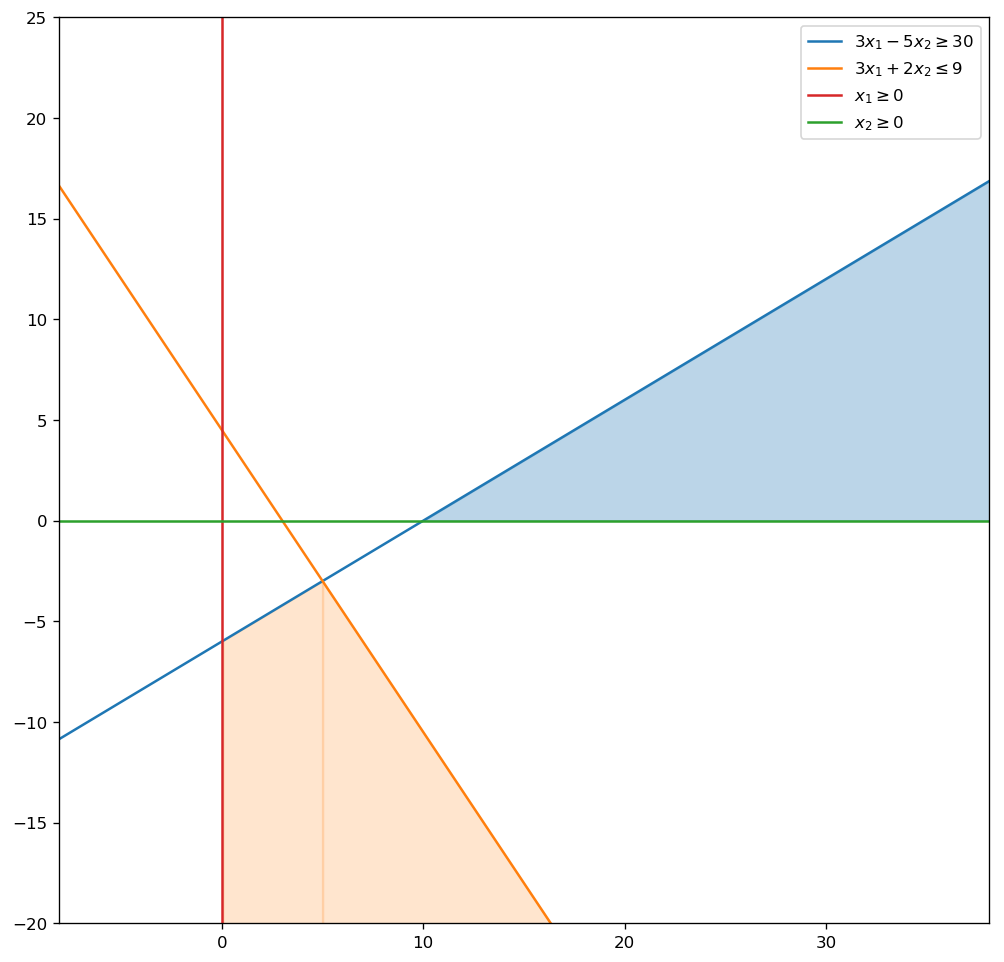

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt

x1 = np.linspace(-100, 50, 2500)

plt.figure(dpi=120, figsize=(10, 10))

__line_f1, *_ = plt.plot(x1, x2f1(x1))
__line_f2, *_ = plt.plot(x1, x2f2(x1))
__line_x2p = plt.axvline(0, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3])
__line_x1p, *_ = plt.plot(x1, np.zeros_like(x1))

plt.axis('equal')
plt.xlim(-5, 35)
plt.ylim(-20, 25)

plt.fill_between(x1, x2f1(x1), np.zeros_like(x1), x2f1(x1) >= 0, color=__line_f1.get_color(), alpha=0.3)
plt.fill_between(x1, x2f1(x1), np.full(x1.shape, -50), np.logical_and(x1 > 0, x2f1(x1) < x2f2(x1)), color=__line_f2.get_color(), alpha=0.2, facecolor=None)
plt.fill_between(x1, x2f2(x1), np.full(x1.shape, -50), x2f1(x1) > x2f2(x1), color=__line_f2.get_color(), alpha=0.2, facecolor=None)


# plt.fill_between(x1,x2f2(x1), x2f1(x1))


plt.legend(["$3x_1-5x_2 \geq 30$", "$3x_1+2x_2 \leq 9$", "$x_1 \geq 0$", "$x_2 \geq 0$"])
plt.savefig("p3.png", quality=100)

## Problem 4. LP 2.4.2

$$
\begin{align*}
    & \min & &2x_1 + 2x_2 \\
    & s.t. & &-6x_1 + 10x_2 \geq 15 \\
    &&& x_1 + x_2 \geq 7 \\
    &&& x_1 \leq 7 \\
    &&& x_2 \geq 0
\end{align*}
$$

Constraint 1: $x_2 \geq \frac{3}{2} + \frac{3}{5}x_1$

Constraint 2: $x_2 \geq 7 - x_1$

In [148]:
def c1(x1):
    def __wrapper(x1):
        return (15 + 6*x1) / 10
    
    return np.vectorize(__wrapper)(x1)

def c2(x1):
    def __wrapper(x1):
        return 7 - x1
    
    return np.vectorize(__wrapper)(x1)

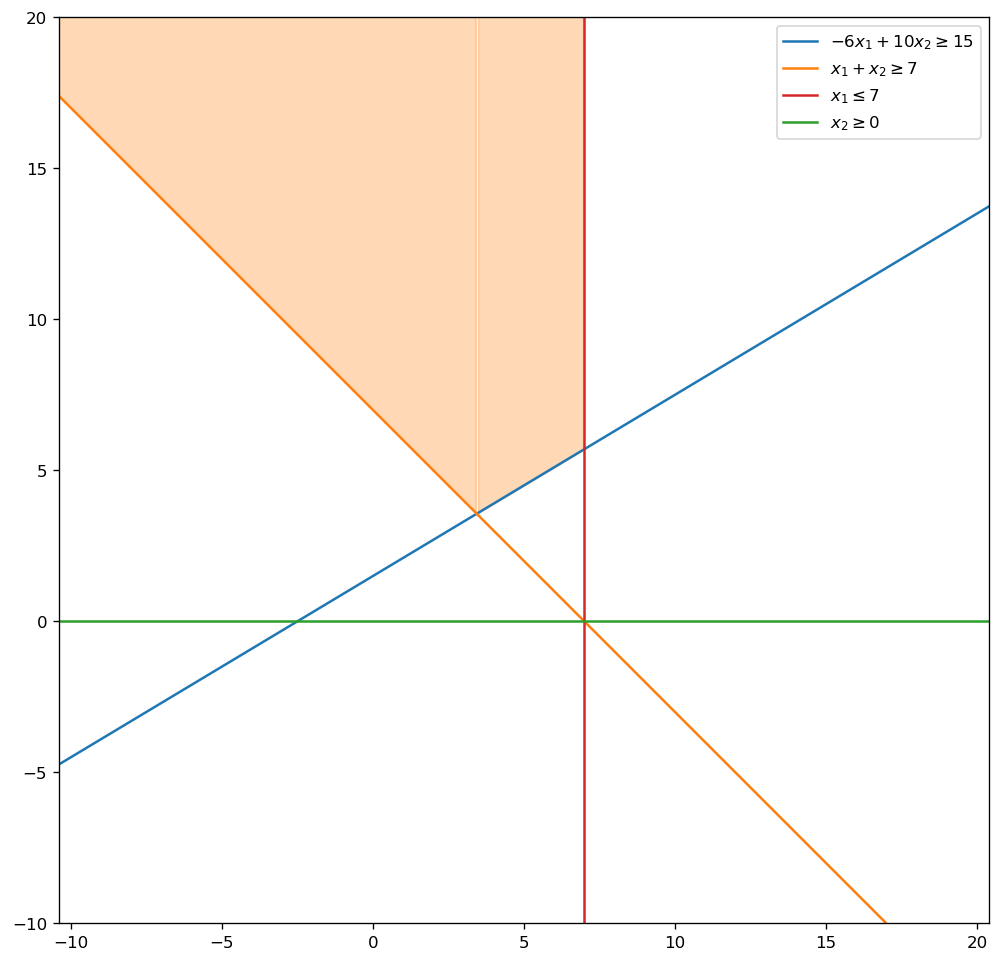

In [173]:
x1 = np.linspace(-100, 50, 2500)

plt.figure(dpi=120, figsize=(10, 10))

__line_c1, *_ = plt.plot(x1, c1(x1))
__line_c2, *_ = plt.plot(x1, c2(x1))
__line_x1p = plt.axvline(7, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3])
__line_x2p, *_ = plt.plot(x1, np.zeros_like(x1))


plt.fill_between(
    x1, c2(x1), np.full(x1.shape, 30),
    where=np.logical_and(x1 <= 7, c2(x1) > c1(x1)),
    color=__line_c2.get_color(), alpha=0.3
)
plt.fill_between(
    x1, c1(x1), np.full(x1.shape, 30),
    where=np.logical_and(x1 <= 7, c2(x1) < c1(x1)),
    color=__line_c2.get_color(), alpha=0.3
)

plt.axis('equal')
plt.xlim(-10, 20)
plt.ylim(-10, 20)

plt.legend(["$-6x_1 + 10x_2 \geq 15 $", "$x_1 + x_2 \geq 7$", "$x_1 \leq 7$", "$x_2 \geq 0$"])

plt.savefig("p4.png", quality=100)